# Import module

The link to get [ImageAnalysis3](https://github.com/zhengpuas47/ImageAnalysis3) 

Or from the Zhuang lab archived [source_tools](https://github.com/ZhuangLab/Chromatin_Analysis_2020_cell/tree/master/sequential_tracing/source)

## ImageAnalysis3 and basic modules

In [2]:
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
from ImageAnalysis3 import *
from ImageAnalysis3.classes import _allowed_kwds

import h5py
import ast
import pandas as pd

print(os.getpid())

59540


## Chromatin_analysis_tools etc

See **functions** in the repository for [AnalysisTool_Chromatin](../../README.md)

In [3]:
# Chromatin_analysis_tools (ATC)
# Get path for the py containing functions
import os
import sys
import importlib
module_path =r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin'
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import relevant modules
import gene_selection 
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)
import loci_1d_features
importlib.reload(loci_1d_features)  

import atac_to_loci
importlib.reload(atac_to_loci)

<module 'atac_to_loci' from 'C:\\Users\\shiwei\\Documents\\AnalysisTool_Chromatin\\atac_to_loci.py'>

# Define folders

In [15]:
# main folder for postanalysis
postanalysis_folder = r'L:\Shiwei\postanalysis_2024\v0'
# input files for postanalysis
input_folder = os.path.join(postanalysis_folder, 'resources_from_preprocess')

# output file to be generated
output_main_folder = os.path.join(postanalysis_folder, 'nucleus_and_chromosome')

output_analysis_folder = os.path.join(output_main_folder, 'analysis')
output_figure_folder = os.path.join(output_main_folder, 'figures')

# make new folder if needed
make_output_folder = True

if make_output_folder and not os.path.exists(output_analysis_folder):
    os.makedirs(output_analysis_folder)
    print(f'Generating analysis folder: {output_analysis_folder}.')
elif os.path.exists(output_analysis_folder):
    print(f'Use existing analysis folder: {output_analysis_folder}.')
    
if make_output_folder and not os.path.exists(output_figure_folder):
    os.makedirs(output_figure_folder)
    print(f'Generating figure folder: {output_figure_folder}.')
elif os.path.exists(output_figure_folder):
    print(f'Use existing figure folder: {output_figure_folder}.')

Use existing analysis folder: L:\Shiwei\postanalysis_2024\v0\nucleus_and_chromosome\analysis.
Use existing figure folder: L:\Shiwei\postanalysis_2024\v0\nucleus_and_chromosome\figures.


# Plotting parameters

In [16]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _double_col_width, _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})  

In [17]:
# Other required plotting parameters
_dpi = 300
_font_size = 7
_page_width = 5.5


## cell type color-codess

In [18]:
# cell labels from RNA-MERFISH and celltype prediction
selected_cell_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5','Sncg','Vip',
                           'Astro','Oligo','OPC','Micro','Endo','VLMC','SMC','Peri', 
                           #'other',
                          ]
# cell palette from RNA-MERFISH UMAP and stats
celltype_palette = {'Astro':'lightcoral', 
                    'Endo':'skyblue', 
                    'L2/3 IT':'gold', 
                    'L4/5 IT':'darkorange', 
                    'L5 ET':'mediumseagreen', 
                    'L5 IT':'aqua',
                    'L5/6 NP':'darkgreen',
                    'L6 CT':'brown',
                    'L6 IT':'magenta',
                    'L6b':'blue', 
                    'Lamp5':'orange', 
                    'Micro':'peachpuff',
                    'OPC':'thistle', 
                    'Oligo':'darkviolet',
                    'Peri':'sandybrown',
                    'Pvalb':'springgreen',
                    'SMC':'rosybrown',
                    'Sncg':'darkkhaki',
                    'Sst':'steelblue', 
                    'VLMC':'saddlebrown', 
                    'Vip':'red',
                    'other':'slategray'}


In [19]:
# this is the plotting order noted based on the snRNA transcriptional acitivty if needed
sorted_cellplot_order_byRNA = ['Micro', 'Oligo', 'Endo', 'OPC', 'Astro', 'Vip', 'Lamp5',
                  'L5/6 NP', 'Sst', 'Sncg', 'Pvalb', 'L4/5 IT', 'L6 CT',
                  'L6 IT', 'L6b', 'L2/3 IT', 'L5 IT', 'L5 ET']

# Load data relevant information

## load and format codebook

[merged codebook](../resources/merged_codebook.csv) as in the repository (merged for all DNA-MERFISH libraries)

In [20]:
# Load codebook 
codebook_fname = os.path.join(input_folder,'merged_codebook.csv')
codebook_df = pd.read_csv (codebook_fname, index_col=0)

# sort df by chr and chr_order
codebook_df = loci_1d_features.sort_loci_df_by_chr_order (codebook_df)
codebook_df.head()

,name,id,NDB_784,NDB_755,NDB_826,NDB_713,NDB_865,NDB_725,NDB_817,NDB_710,...,NDB_479,NDB_562,NDB_608,NDB_460,NDB_563,NDB_592,NDB_368,NDB_436,NDB_629,NDB_604
0,1:3742742-3759944,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1:6245958-6258969,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1:8740008-8759916,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1016,1:9627926-9637875,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017,1:9799472-9811359,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [21]:
# Format the chr loci name by 
# 1. changing loci name format
# 2. extract relevant information such as id, chr, chr_order, and library etc
from gene_to_loci import loci_pos_format
loci_name_list = list(map(loci_pos_format, codebook_df['name'].tolist()))
loci_name_arr = np.array(loci_name_list)

# convert to a new dataframe and set loci name as index
codebook_df = codebook_df[['name','id','chr','chr_order','library']]
codebook_df['loci_name'] = list(loci_name_arr[:,0])
codebook_df = codebook_df.set_index ('loci_name')

codebook_df.head()

,name,id,chr,chr_order,library
loci_name,,,,,
chr1_3742742_3759944,1:3742742-3759944,1,1,0.0,CTP11
chr1_6245958_6258969,1:6245958-6258969,2,1,1.0,CTP11
chr1_8740008_8759916,1:8740008-8759916,3,1,2.0,CTP11
chr1_9627926_9637875,1:9627926-9637875,1,1,3.0,CTP13
chr1_9799472_9811359,1:9799472-9811359,2,1,4.0,CTP13


# Load unnormalized RNA-MERFISH

The below can be generated using jupyter notebook as below:

[preprocess/1_rna_merfish/scripts/1_rna_merfish_preprocessing_and_clustering](../../preprocess/1_rna_merfish/scripts/1_rna_merfish_preprocessing_and_clustering.ipynb)

In [22]:
import scanpy as sc
target_adata_folder = r'L:\Shiwei\RNA_MERFISH_analysis\Merged_nonclear'
# load the processed adata that has UMAP and label information
merged_adata = sc.read(os.path.join(target_adata_folder,'filtered_unnorm_data_w_label.h5ad'))
merged_adata 

AnnData object with n_obs × n_vars = 63196 × 242
    obs: 'fov', 'volume', 'center_x', 'center_y', 'min_x', 'max_x', 'min_y', 'max_y', 'experiment', 'n_genes_by_counts', 'total_counts', 'doublet_score', 'predicted_doublet', 'subclass_label_new', 'class_label_new', 'neuron_identity'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'scrublet'

# Load nucleus volume dataframe

The below can be generated using jupyter notebook as below:

[2_nucleus_and_chromosome/2_nuclei_size_by_convexhull_singlecell_dataframe](../2_nucleus_and_chromosome/2_nuclei_size_by_convexhull_singlecell_dataframe.ipynb)

In [23]:
#nuc_vol_folder = r'L:\Shiwei\postanalysis_2024\v0\nucleus_and_chromosome\analysis'
output_fname = os.path.join(output_analysis_folder, f'nucleus_volume_convexhull_bysubclass.csv')

nuc_volume_df = pd.read_csv(output_fname, index_col=0)
nuc_volume_df

,subclass,nucleus_volume,total_spots
uid,,,
259202492748634617304623818845147108919,Oligo,255.043678,863
336074706103419484501535095917410831417,Oligo,298.589934,1426
179117357717369278884189379535888871018,Oligo,305.797609,1601
36321914521561890358202806077673807953,Oligo,76.777445,210
92271180002801802991585284299263797402,Oligo,376.983590,2034
...,...,...,...
89559371323596133331060964655277765256,VLMC,183.802964,584
144314319466287448491677682735506973,VLMC,92.940088,387
71119619609696733523981100580894538756,VLMC,237.601248,734


# Correlate nuclear volume and total counts at single cells

## all cell types included

In [26]:
min_pts_th = 1250
sel_nuc_volume_df = nuc_volume_df[nuc_volume_df['total_spots']>min_pts_th]

#max_pts_th = 1981*2
#sel_nuc_volume_df = sel_nuc_volume_df[sel_nuc_volume_df['total_spots']<max_pts_th]
shared_obs_ids = np.intersect1d(merged_adata.obs.index,sel_nuc_volume_df.index)
len(shared_obs_ids)

10372

In [27]:
adata_obs_shared = merged_adata[merged_adata.obs.index.isin(shared_obs_ids)].obs.copy(deep=True)
nuc_volume_df_shared = sel_nuc_volume_df.loc[adata_obs_shared.index]

adata_obs_shared['nucleus_volume'] = nuc_volume_df_shared['nucleus_volume']
adata_obs_shared.head()

,fov,volume,center_x,center_y,min_x,max_x,min_y,max_y,experiment,n_genes_by_counts,total_counts,doublet_score,predicted_doublet,subclass_label_new,class_label_new,neuron_identity,nucleus_volume
Unnamed: 0,,,,,,,,,,,,,,,,,
119547840309256440899855144626134392385,0,866.273544,-6009.207800,3915.406099,-6014.078600,-6004.337000,3910.049299,3920.762899,20220304,33,37.0,0.101183,False,other,other,other,264.303208
146535126853720688714614085779839345592,0,727.704167,-6102.573802,3939.868100,-6107.930602,-6097.217002,3934.457300,3945.278900,20220304,46,110.0,0.065279,False,Peri,Peri,Non-Neuronal,242.470170
179117357717369278884189379535888871018,0,824.150872,-6063.315801,3919.402099,-6070.238601,-6056.393001,3914.369299,3924.434899,20220304,41,83.0,0.134576,False,other,other,other,305.797609
263417249135191558595585807213903422136,0,1059.967455,-6043.767801,3967.678101,-6049.826601,-6037.709000,3961.457300,3973.898901,20220304,49,166.0,0.012145,False,other,other,other,324.173164
325020926372310442273713846477549903721,0,809.738017,-6005.157800,3947.212100,-6012.134600,-5998.180999,3942.449300,3951.974900,20220304,16,25.0,0.067768,False,Micro,Micro,Non-Neuronal,260.642105


### cell area (used for segmenation)

meta NOT subset; don't know how to subset; dropped


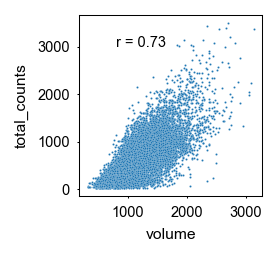

In [36]:
df_plot= adata_obs_shared.copy(deep=True)


fig, ax = plt.subplots(figsize=(_page_width/3.5,_page_width/3.5),dpi=150)


x_col = 'volume'
y_col ='total_counts'
sns.scatterplot(data=df_plot, x=x_col, y=y_col,ax=ax, s=1,)
ax.grid(False)

ax.tick_params('both', labelsize=_font_size, length=1, width=0.5)


from scipy.stats import pearsonr
r_val = pearsonr(df_plot[x_col].values, df_plot[y_col].values)[0]
ax.text(800,3000,f'r = {round(r_val,2)}',fontsize=_font_size)
ax.margins(0.05)
[i[1].set_linewidth(0.5) for i in ax.spines.items()]

plt.savefig(os.path.join(output_figure_folder, f'corr_cell_size_and_RNA_single_cells.pdf'), 
            transparent=True, dpi=300, bbox_inches='tight')

### nuclear area

meta NOT subset; don't know how to subset; dropped


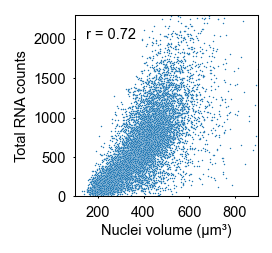

In [35]:
df_plot= adata_obs_shared.copy(deep=True)

fig, ax = plt.subplots(figsize=(_page_width/3.5,_page_width/3.5),dpi=150)


x_col = 'nucleus_volume'
y_col ='total_counts'


sns.scatterplot(data=df_plot, x=x_col, y=y_col,ax=ax, s=0.5, 
                rasterized=True,
                #hue='subclass_label_new'
               )
#plt.legend(bbox_to_anchor=(1.02, 1.04), loc='upper left', ncols=3, borderaxespad=1,fontsize=_font_size)
ax.grid(False)

ax.set_xlabel('Nuclei volume (\u03bcm\u00b3)',fontsize=_font_size,labelpad=2)
ax.set_ylabel(f'Total RNA counts', fontsize=_font_size, labelpad=2)

ax.tick_params('both', labelsize=_font_size, length=1, width=0.5)
               
from scipy.stats import pearsonr
r_val = pearsonr(df_plot[x_col].values, df_plot[y_col].values)[0]
ax.text(150,2000,f'r = {round(r_val,2)}',fontsize=_font_size)
ax.set_xlim([100,900])
ax.set_ylim([0,2300])
ax.margins(0.05)
[i[1].set_linewidth(0.5) for i in ax.spines.items()]

plt.savefig(os.path.join(output_figure_folder, f'corr_nuclear_size_and_RNA_single_cells.pdf'), 
            transparent=True, dpi=300, bbox_inches='tight')

## separate single cell type

In [37]:
np.unique(adata_obs_shared['subclass_label_new'].tolist())

array(['Astro', 'Endo', 'L2/3 IT', 'L4/5 IT', 'L5 ET', 'L5 IT', 'L5/6 NP',
       'L6 CT', 'L6 IT', 'L6b', 'Lamp5', 'Micro', 'OPC', 'Oligo', 'Peri',
       'Pvalb', 'SMC', 'Sncg', 'Sst', 'VLMC', 'Vip', 'nan', 'other'],
      dtype='<U32')

In [38]:
sel_cell_list = ['Peri', 'Endo','Micro','Oligo','Astro', 'OPC',
                 'Sst','Pvalb', 
                 'L2/3 IT', 'L4/5 IT', 'L5 ET', 'L5 IT', 
                 'L6 CT', 'L6 IT', 'L6b', 
                  ]

meta NOT subset; don't know how to subset; dropped


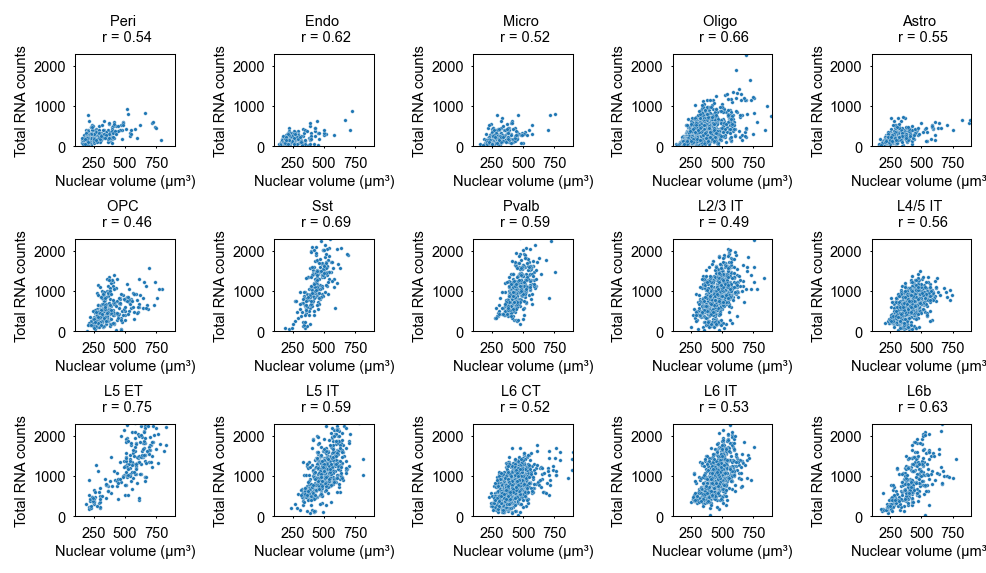

In [40]:
fig, ax_grid = plt.subplots(3,5, figsize=(_page_width*1.2,_page_width*0.7),dpi=150)
ax_flat = ax_grid.flatten()

for ax, _celltype in zip(ax_flat, sel_cell_list):
    df_plot= adata_obs_shared.copy(deep=True)
    df_plot= df_plot[df_plot['subclass_label_new']==_celltype]

    x_col = 'nucleus_volume'
    y_col ='total_counts'


    sns.scatterplot(data=df_plot, x=x_col, y=y_col,ax=ax, s=3, 
                     rasterized=True,
                    #hue='subclass_label_new'
                   )
    ax.grid(False)

    ax.set_xlabel('Nuclear volume (\u03bcm\u00b3)',fontsize=_font_size,labelpad=2)
    ax.set_ylabel(f'Total RNA counts', fontsize=_font_size, labelpad=2)
    
    ax.tick_params('both', labelsize=_font_size, length=1, width=0.5)

    from scipy.stats import pearsonr
    r_val = pearsonr(df_plot[x_col].values, df_plot[y_col].values)[0]
    ax.set_title(f'{_celltype} \n r = {round(r_val,2)}',fontsize=_font_size)
    ax.set_xlim([100,900])
    ax.set_ylim([0,2300])
    ax.margins(0.05)
    [i[1].set_linewidth(0.5) for i in ax.spines.items()]

plt.tight_layout()
fig.subplots_adjust(wspace=1, hspace=1)

plt.savefig(os.path.join(output_figure_folder, f'corr_nuclear_size_and_RNA_single_cells_diff_celltype.pdf'), 
            transparent=True, dpi=300, bbox_inches='tight')

plt.show()